In [176]:
import geopandas as gpd
import pandas as pd
import numpy as np
import glob
import contextily as cx
import matplotlib.pyplot as plt

In [3]:
parsons_dir = "//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2025_winter/MagnaProbe_March2025/Parsons/"
kamik_dir = "//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2025_winter/MagnaProbe_March2025/Kamik/"
tuk_dir = "//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2025_winter/MagnaProbe_March2025/TukL09/"
tuktuk_dir = "//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2025_winter/MagnaProbe_March2025/TuktukA12/"

In [165]:

import parso


parsons_files = glob.glob(parsons_dir + '*/*.csv')

parsons = []

for f in parsons_files:
    csv = pd.read_csv(f)
    parsons.append(csv)
parsons = pd.concat(parsons)

parsons

,Date/Time_UTC,MeasNum,SampleCnt,Dsn_cm,Vbat,Lat,Lon,Alt_m,NumSat,GPS_Status,LatErr_m,LonErr_m,AltErr_m,NumExt
0,2025-03-09 17:28:18,4,1,37.6,16.9,68.854211,-133.535762,40.7,12,3,0.00,0.00,0.0,0
1,2025-03-09 17:28:20,4,2,37.5,16.9,68.854211,-133.535758,40.6,12,3,0.88,0.71,1.7,0
2,2025-03-09 17:28:21,4,3,37.5,16.9,68.854211,-133.535759,41.0,12,3,0.00,0.00,0.0,0
3,2025-03-09 17:28:22,4,4,37.5,16.9,68.854212,-133.535761,40.6,12,3,0.00,0.00,0.0,0
4,2025-03-09 17:28:23,4,5,37.5,16.9,68.854212,-133.535763,40.4,12,3,0.00,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,2025-03-11 19:18:55,430,6,14.1,16.0,68.854107,-133.538098,37.2,12,4,0.00,0.00,0.0,0
1016,2025-03-11 19:18:56,430,7,14.1,16.0,68.854107,-133.538099,37.0,12,4,0.00,0.00,0.0,0
1017,2025-03-11 19:18:57,430,8,14.1,16.0,68.854107,-133.538099,36.9,12,4,0.00,0.00,0.0,0
1018,2025-03-11 19:18:58,430,9,14.2,16.0,68.854112,-133.538097,36.9,12,4,0.00,0.00,0.0,0


In [166]:
parsons = parsons[parsons[' MeasNum']>1]

In [167]:

parsons_gdf = gpd.GeoDataFrame(parsons, geometry=gpd.points_from_xy(parsons[' Lon'], parsons[' Lat']), crs=4326)


parsons_gdf.head()

,Date/Time_UTC,MeasNum,SampleCnt,Dsn_cm,Vbat,Lat,Lon,Alt_m,NumSat,GPS_Status,LatErr_m,LonErr_m,AltErr_m,NumExt,geometry
0,2025-03-09 17:28:18,4,1,37.6,16.9,68.854211,-133.535762,40.7,12,3,0.00,0.00,0.0,0,POINT (-133.53576 68.85421)
1,2025-03-09 17:28:20,4,2,37.5,16.9,68.854211,-133.535758,40.6,12,3,0.88,0.71,1.7,0,POINT (-133.53576 68.85421)
2,2025-03-09 17:28:21,4,3,37.5,16.9,68.854211,-133.535759,41.0,12,3,0.00,0.00,0.0,0,POINT (-133.53576 68.85421)
3,2025-03-09 17:28:22,4,4,37.5,16.9,68.854212,-133.535761,40.6,12,3,0.00,0.00,0.0,0,POINT (-133.53576 68.85421)
4,2025-03-09 17:28:23,4,5,37.5,16.9,68.854212,-133.535763,40.4,12,3,0.00,0.00,0.0,0,POINT (-133.53576 68.85421)


Text(0.5, 1.0, 'Parsons E-02')

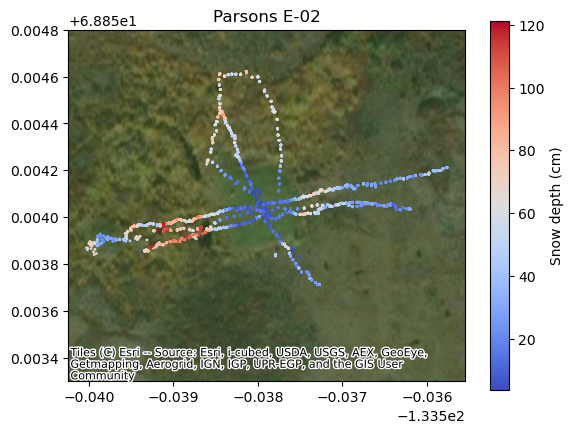

In [168]:
parsons_gdf = parsons_gdf.to_crs(epsg=4326)
ax = parsons_gdf.plot(column=' Dsn_cm', cmap='coolwarm', legend=True, markersize=1, legend_kwds={"label": "Snow depth (cm)", "orientation": "vertical"})

ax.set_ylim(0.0033+6.885e1, 0.0048+6.885e1)
cx.add_basemap(ax, zoom=17, source=cx.providers.Esri.WorldImagery, crs=parsons_gdf.crs)
ax.set_title('Parsons E-02')

In [169]:
kamik_files = glob.glob(kamik_dir + '*/*.csv')

kamik = []

for f in kamik_files:
    csv = pd.read_csv(f)
    kamik.append(csv)
kamik = pd.concat(kamik)
kamik = kamik[(kamik[' Dsn_cm']>0)]

kamik_gdf = gpd.GeoDataFrame(kamik, geometry=gpd.points_from_xy(kamik[' Lon'], kamik[' Lat']), crs=4326)


kamik_gdf.head()

,Date/Time_UTC,MeasNum,SampleCnt,Dsn_cm,Vbat,Lat,Lon,Alt_m,NumSat,GPS_Status,LatErr_m,LonErr_m,AltErr_m,NumExt,geometry
0,2025-03-14 18:18:50,431,1,3.7,16.1,68.956360,-133.400004,25.5,12,3,0.0,0.0,0.0,0,POINT (-133.40000 68.95636)
1,2025-03-14 18:19:25,431,2,3.7,16.1,68.956353,-133.399974,25.9,12,3,0.0,0.0,0.0,0,POINT (-133.39997 68.95635)
2,2025-03-14 18:19:26,431,3,3.7,16.1,68.956353,-133.399973,25.9,12,3,0.0,0.0,0.0,0,POINT (-133.39997 68.95635)
3,2025-03-14 18:19:27,431,4,3.7,16.1,68.956353,-133.399971,25.9,12,3,0.0,0.0,0.0,0,POINT (-133.39997 68.95635)
4,2025-03-14 18:19:28,431,5,3.7,16.1,68.956353,-133.399971,25.8,12,3,0.0,0.0,0.0,0,POINT (-133.39997 68.95635)


Text(0.5, 1.0, 'Kamik F-38')

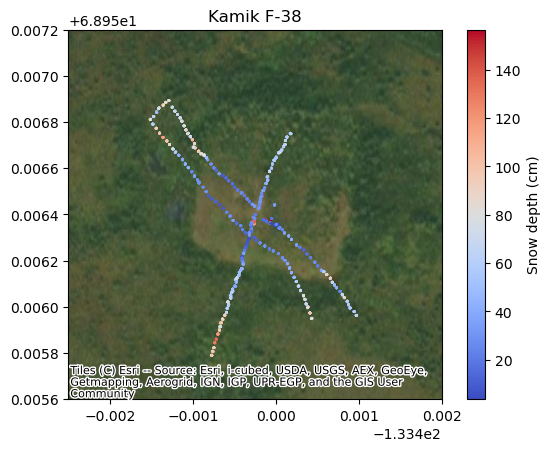

In [171]:
kamik_gdf = kamik_gdf.to_crs(epsg=4326)
ax = kamik_gdf.plot(column=' Dsn_cm', cmap='coolwarm', legend=True, markersize=1, legend_kwds={"label": "Snow depth (cm)", "orientation": "vertical"})

ax.set_ylim(0.0056+6.895e1, 0.0072+6.895e1)
ax.set_xlim(-0.0025-1.334e2, 0.002-1.334e2)
cx.add_basemap(ax, zoom=17, source=cx.providers.Esri.WorldImagery, crs=kamik_gdf.crs)
ax.set_title('Kamik F-38')

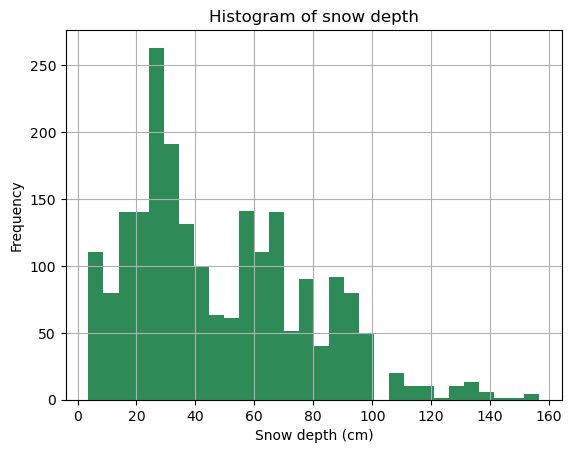

In [191]:
ax = kamik[' Dsn_cm'].hist(bins=30, color='seagreen')
ax.set_xlabel('Snow depth (cm)') 
ax.set_ylabel('Frequency') 
ax.set_title('Histogram of snow depth')
ax.grid(which='minor', alpha=0.1)
#ax.yaxis.grid()

In [152]:
tuktuk_files = glob.glob(tuktuk_dir + '*/*.csv')

tuktuk = []

for f in tuktuk_files:
    csv = pd.read_csv(f)
    tuktuk.append(csv)
tuktuk = pd.concat(tuktuk)
#tuktuk = kamik[(kamik[' Dsn_cm']>0) & (kamik[' MeasNum']>430)]

tuktuk_gdf = gpd.GeoDataFrame(tuktuk, geometry=gpd.points_from_xy(tuktuk[' Lon'], tuktuk[' Lat']), crs=4326)


tuktuk_gdf.head()

,Date/Time_UTC,MeasNum,SampleCnt,Dsn_cm,Vbat,Lat,Lon,Alt_m,NumSat,GPS_Status,LatErr_m,LonErr_m,AltErr_m,NumExt,geometry
0,2025-03-21 19:56:05,651,1,3.7,15.9,69.350538,-133.051478,21.6,12,4,0.0,0.0,0.0,0,POINT (-133.05148 69.35054)
1,2025-03-21 19:56:08,651,2,3.7,15.9,69.350537,-133.051477,21.6,12,4,0.0,0.0,0.0,0,POINT (-133.05148 69.35054)
2,2025-03-21 19:56:09,651,3,3.7,15.9,69.350537,-133.051478,21.6,12,4,0.0,0.0,0.0,0,POINT (-133.05148 69.35054)
3,2025-03-21 19:56:10,651,4,3.7,15.9,69.350537,-133.051478,21.6,12,4,0.0,0.0,0.0,0,POINT (-133.05148 69.35054)
4,2025-03-21 19:56:11,651,5,3.7,15.9,69.350536,-133.051479,21.6,12,4,0.0,0.0,0.0,0,POINT (-133.05148 69.35054)


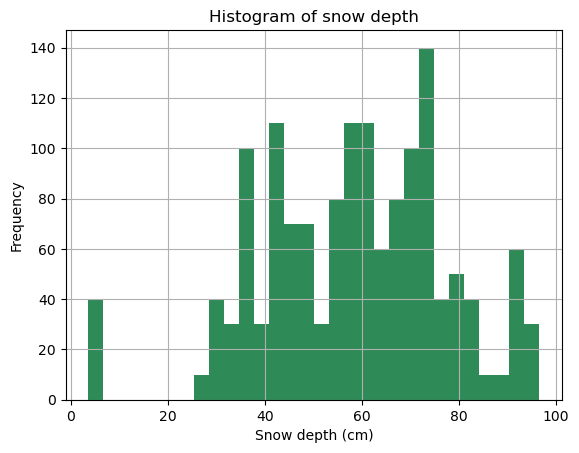

In [192]:
ax = tuktuk[' Dsn_cm'].hist(bins=30, color='seagreen')
ax.set_xlabel('Snow depth (cm)') 
ax.set_ylabel('Frequency') 
ax.set_title('Histogram of snow depth')
ax.grid(which='minor', alpha=0.1)

In [195]:
tuktuk[' Dsn_cm'].describe()

count    1450.000000
mean       58.343793
std        19.100244
min         3.600000
25%        44.400000
50%        59.500000
75%        72.000000
max        96.600000
Name:  Dsn_cm, dtype: float64

Text(0.5, 1.0, 'Tuktuk A-12')

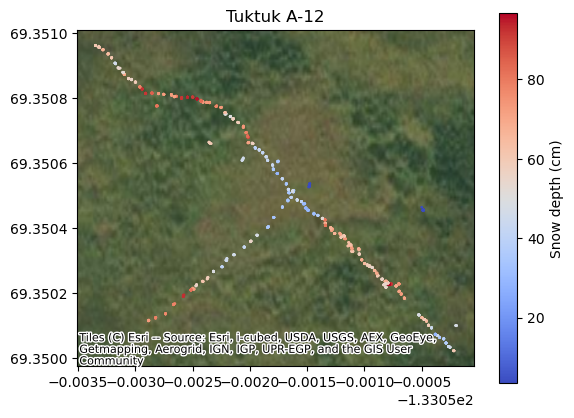

In [154]:
tuktuk_gdf = tuktuk_gdf.to_crs(epsg=4326)
ax = tuktuk_gdf.plot(column=' Dsn_cm', cmap='coolwarm', legend=True, markersize=1, legend_kwds={"label": "Snow depth (cm)", "orientation": "vertical"})

#ax.set_ylim(0.0056+6.895e1, 0.0072+6.895e1)
#ax.set_xlim(-0.0025-1.334e2, 0.002-1.334e2)
cx.add_basemap(ax, zoom=17, source=cx.providers.Esri.WorldImagery, crs=kamik_gdf.crs)
ax.set_title('Tuktuk A-12')

In [157]:
tuk_files = glob.glob(tuk_dir + '*/*.csv')

tuk = []

for f in tuk_files:
    csv = pd.read_csv(f)
    tuk.append(csv)
tuk = pd.concat(tuk)
tuk = tuk[(tuk[' Dsn_cm']>0)]

tuk_gdf = gpd.GeoDataFrame(tuk, geometry=gpd.points_from_xy(tuk[' Lon'], tuk[' Lat']), crs=4326)


tuk_gdf.head()

,Date/Time_UTC,MeasNum,SampleCnt,Dsn_cm,Vbat,Lat,Lon,Alt_m,NumSat,GPS_Status,LatErr_m,LonErr_m,AltErr_m,NumExt,geometry
0,2025-03-25 20:05:11,931,1,66.1,16.8,69.312633,-133.039297,30.1,12,3,0.0,0.0,0.0,0,POINT (-133.03930 69.31263)
1,2025-03-25 20:05:13,931,2,66.1,16.8,69.312633,-133.039297,30.0,12,3,0.0,0.0,0.0,0,POINT (-133.03930 69.31263)
2,2025-03-25 20:05:14,931,3,66.1,16.8,69.312633,-133.039296,29.9,12,3,0.0,0.0,0.0,0,POINT (-133.03930 69.31263)
3,2025-03-25 20:05:15,931,4,66.1,16.8,69.312634,-133.039296,29.9,12,3,0.0,0.0,0.0,0,POINT (-133.03930 69.31263)
4,2025-03-25 20:05:16,931,5,66.1,16.8,69.312634,-133.039296,29.9,12,3,0.0,0.0,0.0,0,POINT (-133.03930 69.31263)


Text(0.5, 1.0, 'Tuk L-09')

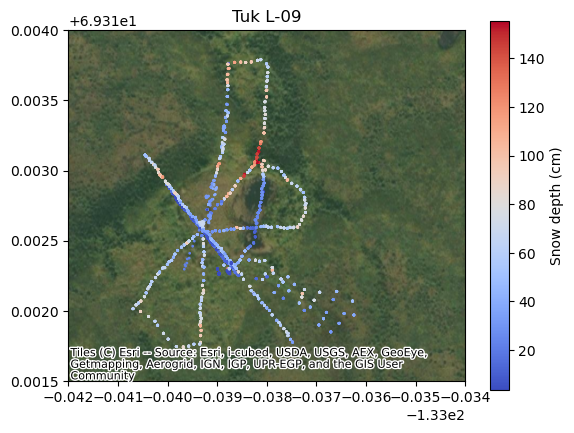

In [161]:
tuk_gdf = tuk_gdf.to_crs(epsg=4326)
ax = tuk_gdf.plot(column=' Dsn_cm', cmap='coolwarm', legend=True, markersize=1, legend_kwds={"label": "Snow depth (cm)", "orientation": "vertical"})

ax.set_ylim(0.0015+6.931e1, 0.004+6.931e1)
ax.set_xlim(-0.042-1.33e2, -0.034-1.33e2)
cx.add_basemap(ax, zoom=17, source=cx.providers.Esri.WorldImagery, crs=tuk_gdf.crs)
ax.set_title('Tuk L-09')

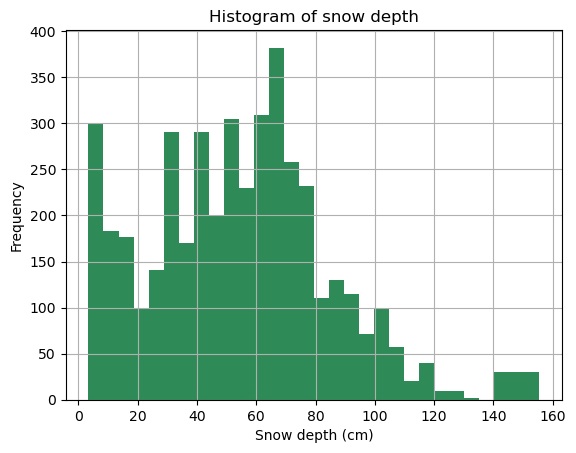

In [196]:
ax = tuk[' Dsn_cm'].hist(bins=30, color='seagreen')
ax.set_xlabel('Snow depth (cm)') 
ax.set_ylabel('Frequency') 
ax.set_title('Histogram of snow depth')
ax.grid(which='minor', alpha=0.1)

In [197]:
tuk[' Dsn_cm'].describe()

count    4322.000000
mean       54.604604
std        30.923280
min         3.400000
25%        32.500000
50%        54.600000
75%        72.700000
max       155.500000
Name:  Dsn_cm, dtype: float64